<a href="https://colab.research.google.com/github/ambicapvs/ambica_info5731_spring2021/blob/main/project%20code1.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dataframe = pd.read_csv('/content/vaccinetweets.csv',sep=',',engine ='python', header=0)
dataframe

,tweetid,moderna,pfizer
0,0,"⚠️ Moins de Moderna, plus de Pfizer... l'appro...","⚠️ Moins de Moderna, plus de Pfizer... l'appro..."
1,1,@quartzpuerta @MrVanGriffin @AlanSarapa I real...,@AlexBerenson @pfizer @bmj_latest Link To This...
2,2,"@marcetravisany QUEDAN PFIZER, MODERNA, SPUTNI...",@escobar_riera Dr. Tuve covid en enero antes d...
3,3,@GrayAdalind As you seem to have an interest i...,"@cupidzclozet me - in fact, I am 20 days past ..."
4,4,@lazaroperez768 Lázaro cariño mío..\r\nBuena ...,@quartzpuerta @MrVanGriffin @AlanSarapa I real...
...,...,...,...
59995,9995,@BadAstronomer Moderna #2 body-slammed me but ...,"Covid, Pfizer identifica vaccini falsi anche i..."
59996,9996,Πόσο διαρκεί η προστασία από τα εμβόλια Pfizer...,@AndrewZung @Gimzar @richard680news Why wouldn...
59997,9997,@AmberB_SD Moderna. Everyone is different thou...,@Azael18A La estrategia fue la misma que con l...
59998,9998,FIRST MODERNA SHOT DOWN!\r\n\r\nAhhhhhhh it’s ...,48 hours since my 2nd Pfizer shot and I have n...


In [ ]:
import requests
from textblob import Word
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from textblob import TextBlob
from nltk.stem import PorterStemmer


def CleanData(dfcolumn):
  linksremoved = dfcolumn.replace(to_replace=r'^https?:\/\/.*[\r\n]*',value='',regex=True)
  punctuationremoved = linksremoved.str.replace('[^\w\s]','')
  spclcharsremoved = punctuationremoved.str.replace('[^A-Za-z0-9 ]+','')
  numsremoved = spclcharsremoved.str.replace('[^A-Za-z ]+','')
  data = requests.get("https://gist.githubusercontent.com/sebleier/554280/raw/7e0e4a1ce04c2bb7bd41089c9821dbcf6d0c786c/NLTK's%2520list%2520of%2520english%2520stopwords")
  a = data.text
  stop = a.split()
  stopwordsremoved = numsremoved.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
  lowercased = stopwordsremoved.apply(lambda x: " ".join(x.lower() for x in x.split()))
  tokenized = lowercased.apply(lambda x: TextBlob(x).words)
  st = PorterStemmer()
  stemmed = tokenized.apply(lambda x: " ".join([st.stem(word) for word in x]))
  #Lemmatization
  lemmatized = stemmed.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
  return lemmatized

modn = CleanData(dataframe['moderna'])
pfizr = CleanData(dataframe['pfizer'])
dataframe['moderna_cleaned'] = modn
dataframe['pfizer_cleaned'] = pfizr

dataframe

<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence \w
<input>:12: DeprecationWarning: invalid escape sequence 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweetid,moderna,pfizer,moderna_cleaned,pfizer_cleaned
0,0,"⚠️ Moins de Moderna, plus de Pfizer... l'appro...","⚠️ Moins de Moderna, plus de Pfizer... l'appro...",moin de moderna plu de pfizer lapprovisionn en...,moin de moderna plu de pfizer lapprovisionn en...
1,1,@quartzpuerta @MrVanGriffin @AlanSarapa I real...,@AlexBerenson @pfizer @bmj_latest Link To This...,quartzpuerta mrvangriffin alansarapa i realli ...,alexberenson pfizer bmjlatest link to thi bmj ...
2,2,"@marcetravisany QUEDAN PFIZER, MODERNA, SPUTNI...",@escobar_riera Dr. Tuve covid en enero antes d...,marcetravisani quedan pfizer moderna sputnik y...,escobarriera dr tuve covid en enero ant de aye...
3,3,@GrayAdalind As you seem to have an interest i...,"@cupidzclozet me - in fact, I am 20 days past ...",grayadalind a seem interest testimoni got mode...,cupidzclozet fact i day past nd shot pfizer
4,4,@lazaroperez768 Lázaro cariño mío..\r\nBuena ...,@quartzpuerta @MrVanGriffin @AlanSarapa I real...,lazaroperez lzaro cario mobuena tardeni duda c...,quartzpuerta mrvangriffin alansarapa i realli ...
...,...,...,...,...,...
59995,9995,@BadAstronomer Moderna #2 body-slammed me but ...,"Covid, Pfizer identifica vaccini falsi anche i...",badastronom moderna bodyslam i would show mode...,covid pfizer identifica vaccini falsi anch eur...
59996,9996,Πόσο διαρκεί η προστασία από τα εμβόλια Pfizer...,@AndrewZung @Gimzar @richard680news Why wouldn...,pfizer moderna johnson amp johnsonhttpstcoabph...,andrewzung gimzar richardnew whi wouldnt pfize...
59997,9997,@AmberB_SD Moderna. Everyone is different thou...,@Azael18A La estrategia fue la misma que con l...,amberbsd moderna everyon differ though my bodi...,azaela la estrategia fue la misma que con la p...
59998,9998,FIRST MODERNA SHOT DOWN!\r\n\r\nAhhhhhhh it’s ...,48 hours since my 2nd Pfizer shot and I have n...,first moderna shot downahhhhhhh weeeeird get v...,hour sinc nd pfizer shot i experienc advers si...


**SENTIMENT ANALYSIS OF TWEETS**

In [ ]:
#SENTIMENT ANALYSIS OF PFIZER tweets:


# Create function to get the subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# Create function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#create two columns for moderna and two columns for pfizer

dataframe['moderna_subjectivity']=dataframe['moderna_cleaned'].apply(getSubjectivity)
dataframe['moderna_polarity']=dataframe['moderna_cleaned'].apply(getPolarity)
dataframe['pfizer_subjectivity']=dataframe['pfizer_cleaned'].apply(getSubjectivity)
dataframe['pfizer_polarity']=dataframe['pfizer_cleaned'].apply(getPolarity)

#compute the negative, neutral, and positive analysis 
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score ==0:
    return 'Neutral'
  else:
    return 'Positive'
dataframe['modernasentiment']=dataframe['moderna_polarity'].apply(getAnalysis)
dataframe['pfizersentiment']=dataframe['pfizer_polarity'].apply(getAnalysis)
dataframe






,tweetid,moderna,pfizer,moderna_cleaned,pfizer_cleaned,moderna_subjectivity,moderna_polarity,pfizer_subjectivity,pfizer_polarity,modernasentiment,pfizersentiment
0,0,"⚠️ Moins de Moderna, plus de Pfizer... l'appro...","⚠️ Moins de Moderna, plus de Pfizer... l'appro...",moin de moderna plu de pfizer lapprovisionn en...,moin de moderna plu de pfizer lapprovisionn en...,0.000000,0.000,0.00,0.00,Neutral,Neutral
1,1,@quartzpuerta @MrVanGriffin @AlanSarapa I real...,@AlexBerenson @pfizer @bmj_latest Link To This...,quartzpuerta mrvangriffin alansarapa i realli ...,alexberenson pfizer bmjlatest link to thi bmj ...,0.500000,0.000,0.00,0.00,Neutral,Neutral
2,2,"@marcetravisany QUEDAN PFIZER, MODERNA, SPUTNI...",@escobar_riera Dr. Tuve covid en enero antes d...,marcetravisani quedan pfizer moderna sputnik y...,escobarriera dr tuve covid en enero ant de aye...,0.000000,0.000,0.00,0.00,Neutral,Neutral
3,3,@GrayAdalind As you seem to have an interest i...,"@cupidzclozet me - in fact, I am 20 days past ...",grayadalind a seem interest testimoni got mode...,cupidzclozet fact i day past nd shot pfizer,0.300000,-0.100,0.25,-0.25,Negative,Negative
4,4,@lazaroperez768 Lázaro cariño mío..\r\nBuena ...,@quartzpuerta @MrVanGriffin @AlanSarapa I real...,lazaroperez lzaro cario mobuena tardeni duda c...,quartzpuerta mrvangriffin alansarapa i realli ...,0.000000,0.000,0.50,0.00,Neutral,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
59995,9995,@BadAstronomer Moderna #2 body-slammed me but ...,"Covid, Pfizer identifica vaccini falsi anche i...",badastronom moderna bodyslam i would show mode...,covid pfizer identifica vaccini falsi anch eur...,0.000000,0.000,0.00,0.00,Neutral,Neutral
59996,9996,Πόσο διαρκεί η προστασία από τα εμβόλια Pfizer...,@AndrewZung @Gimzar @richard680news Why wouldn...,pfizer moderna johnson amp johnsonhttpstcoabph...,andrewzung gimzar richardnew whi wouldnt pfize...,0.000000,0.000,0.00,0.00,Neutral,Neutral
59997,9997,@AmberB_SD Moderna. Everyone is different thou...,@Azael18A La estrategia fue la misma que con l...,amberbsd moderna everyon differ though my bodi...,azaela la estrategia fue la misma que con la p...,0.625000,-0.375,0.00,0.00,Negative,Neutral
59998,9998,FIRST MODERNA SHOT DOWN!\r\n\r\nAhhhhhhh it’s ...,48 hours since my 2nd Pfizer shot and I have n...,first moderna shot downahhhhhhh weeeeird get v...,hour sinc nd pfizer shot i experienc advers si...,0.216667,0.125,0.20,-0.05,Positive,Negative


In [ ]:

#Percentage calculation
def SentimentCount(senti, vaccsentiment):
  bufferlist =[]
  for item in sentimentDataframe[vaccsentiment]:
    if item == senti:
      bufferlist.append(item)
  percent = (len(bufferlist)/len(sentimentDataframe) * 100)
  return percent

percentpositivepfizer = SentimentCount('positive','pfizersentiment')
percentnegativepfizer = SentimentCount('negative','pfizersentiment')
percentneutralpfizer = SentimentCount('neutral', 'pfizersentiment')
print("Percentage of Pfizer Positive tweets: ",percentpositivepfizer, "%" )
print("Percentage of Pfizer Negative tweets: ", percentnegativepfizer, "%")
print("Percentage of Pfizer Neutral tweets: ",percentneutralpfizer, "%" )




Percentage of Pfizer Positive tweets:  18.840840976181354 %
Percentage of Pfizer Negative tweets:  7.341640940126642 %
Percentage of Pfizer Neutral tweets:  73.81751808369201 %


In [ ]:
percentpositivemoderna = SentimentCount('positive','modernasentiment')
percentnegativemoderna = SentimentCount('negative','modernasentiment')
percentneutralmoderna = SentimentCount('neutral', 'modernasentiment')

print("Percentage of Moderna Positive tweets: ",percentpositivemoderna)
print("Percentage of Moderna Negative tweets: ",percentnegativemoderna)
print("Percentage of Moderna Neutral tweets: ",percentneutralmoderna )

Percentage of Moderna Positive tweets:  21.299321720711177
Percentage of Moderna Negative tweets:  8.799603398156702
Percentage of Moderna Neutral tweets:  69.90107488113212


(-0.5, 499.5, 299.5, -0.5)

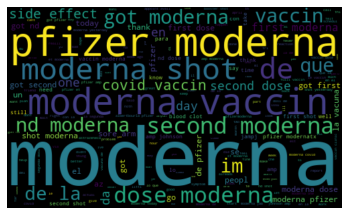

In [ ]:
#moderna wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
allWords=''.join([twts for twts in dataframe['moderna_cleaned']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')

(-0.5, 499.5, 299.5, -0.5)

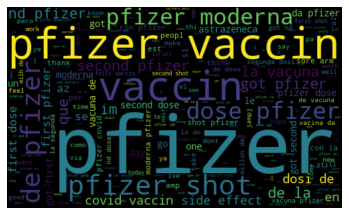

In [ ]:
#pfizerwordcloud
allWords=''.join([twts for twts in dataframe['pfizer_cleaned']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')

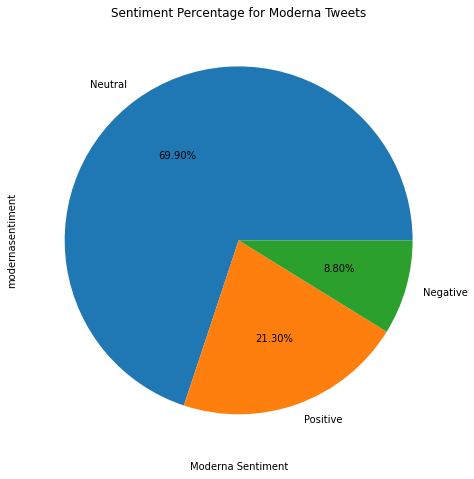

In [ ]:
#Sentiment Pie chart Moderna 
dataframe['modernasentiment'].value_counts()
plt.figure(figsize=(8,8))
plt.title('Sentiment Percentage for Moderna Tweets')
plt.xlabel('Moderna Sentiment')
plt.ylabel('Count')
dataframe['modernasentiment'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%')
plt.show()


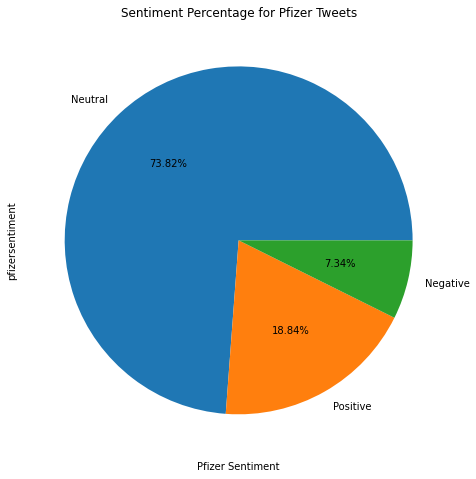

In [ ]:
#Sentiment Pie chart Pfizer 
dataframe['pfizersentiment'].value_counts()
plt.figure(figsize=(8,8))
plt.title('Sentiment Percentage for Pfizer Tweets')
plt.xlabel('Pfizer Sentiment')
plt.ylabel('Count')
dataframe['pfizersentiment'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%')
plt.show()

In [ ]:
#Parts of Speech (POS) Tagging
!pip install Corenlp
nltk.download('universal_tagset') 
nltk.download('averaged_perceptron_tagger')


In [ ]:
from nltk.tokenize import word_tokenize
texts =dataframe['moderna_cleaned'].tolist()
map(word_tokenize, texts)

**MODERNA TEXT PROCESSING**

In [ ]:
from nltk import pos_tag_sents
import nltk
def POStagging(cleanedcolumn):
  WtoPOS=pos_tag_sents(dataframe[cleanedcolumn].apply(word_tokenize).tolist())
  dataframe['moderna_POS_Tag'] = WtoPOS
  app = pd.Series(WtoPOS)
  app.map(lambda x:1 if x[1:]=='N' else 0).sum()
  print(app)
  i=j=k=l=m=n=p=q=s=t=0
  for x in WtoPOS:
    for y in x:
      for o in y:
        if o == 'NN':
          i=i+1
        elif o == 'VBP':
          j=j+1
        elif o == 'RB':
          k=k+1
        elif o == 'JJ':
          l=l+1
        elif o == 'MD':
          m=m+1
        elif o == 'CC':
          n=n+1
        elif o == 'IN':
          p=p+1
        elif o == 'DT':
          q=q+1
        elif o == 'NNP':
          s=s+1
        elif o == 'JJR':
          t=t+1
        else: 0

  print('NOUN:',i)
  print('VERB:',j)
  print('ADVERB:',k)
  print('ADJECTIVE:',l)
  print('MODAL AUXILIARY:',m)
  print('COORDINATING CONJUNCTION:',n)
  print('SUBORDINATING CONJUNCTION:',p)
  print('DETERMINER:',q)
  print('PROPER NOUN:',s)
  print('COMPARATIVE ADJECTIVE:',t)

print("MODERNA POS:")
POStagging('moderna_cleaned')


0        [(moin, NN), (de, FW), (moderna, FW), (plu, FW...
1        [(quartzpuerta, NN), (mrvangriffin, NN), (alan...
2        [(marcetravisani, NN), (quedan, NN), (pfizer, ...
3        [(grayadalind, VB), (a, DT), (seem, JJ), (inte...
4        [(lazaroperez, NN), (lzaro, NN), (cario, NN), ...
                               ...                        
44372                                      [(moderna, NN)]
44373    [(aiyrham, NN), (mom, NN), (first, RB), (shot,...
44374    [(final, JJ), (got, VBD), (nd, JJ), (moderna, ...
44375    [(una, NN), (de, IN), (la, FW), (poca, FW), (p...
44376    [(tubbytobylani, NN), (moderna, NNS), (rough, ...
Length: 44377, dtype: object
MODERNA POS:
NOUN: 308213
VERB: 20943
ADVERB: 13197
ADJECTIVE: 70140
MODAL AUXILIARY: 2357
COORDINATING CONJUNCTION: 1652
SUBORDINATING CONJUNCTION: 15112
DETERMINER: 4768
PROPER NOUN: 504
COMPARATIVE ADJECTIVE: 910


In [ ]:
print("PFizer POS:")
POStagging('pfizer_cleaned')

PFizer POS:
0        [(moin, NN), (de, FW), (moderna, FW), (plu, FW...
1        [(alexberenson, NN), (pfizer, NN), (bmjlatest,...
2        [(escobarriera, NN), (dr, NN), (tuve, NN), (co...
3        [(cupidzclozet, NN), (fact, NN), (i, JJ), (day...
4        [(quartzpuerta, NN), (mrvangriffin, NN), (alan...
                               ...                        
44372    [(kan, NN), (op, MD), (bloedaandoen, VB), (pvt...
44373             [(mulatu, NN), (httpstcosmivylrobo, NN)]
44374    [(je, NN), (veux, NN), (fair, JJ), (mon, JJ), ...
44375    [(redpaint, NN), (cwilsonin, NN), (pfizer, NN)...
44376                        [(loceann, NN), (celpic, NN)]
Length: 44377, dtype: object
MODERNA POS:
NOUN: 320020
VERB: 18937
ADVERB: 11878
ADJECTIVE: 70618
MODAL AUXILIARY: 2169
COORDINATING CONJUNCTION: 1483
SUBORDINATING CONJUNCTION: 16314
DETERMINER: 5061
PROPER NOUN: 598
COMPARATIVE ADJECTIVE: 926


**MORE SENTIMENT ANALYSIS FOR MODERNA**

In [ ]:
#TF-IDF vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect= TfidfVectorizer(analyzer='word')   
tfidf_vect.fit(dataframe['moderna_cleaned'])
xtfidf=tfidf_vect.transform(dataframe['moderna_cleaned'])

#split the dataset into training and validation datasets 
from sklearn.model_selection import train_test_split
x_train_m, x_test_m, y_train_m, y_test_m=train_test_split(xtfidf, dataframe['modernasentiment'], test_size=0.2, random_state=0)

tfidf_vectp= TfidfVectorizer(analyzer='word')   
tfidf_vectp.fit(dataframe['pfizer_cleaned'])
xtfidfp=tfidf_vectp.transform(dataframe['pfizer_cleaned'])

#split the dataset into training and validation datasets 
x_train_p, x_test_p, y_train_p, y_test_p=train_test_split(xtfidfp, dataframe['pfizersentiment'], test_size=0.2, random_state=0)




**MULTINOMAIL NAIVEBAYES**

Moderna NaiveBayes Score: 0.779
['Neutral' 'Neutral' 'Neutral' ... 'Neutral' 'Neutral' 'Neutral']


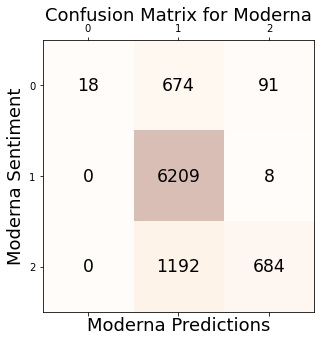

Moderna NB Accuracy: 77.86164939161785
Moderna NB recall: 46.210241839446084
Moderna NB Precision: 88.08265423531786
Moderna NB F1-score: 47.610021384365965
78.55% accuracy with a standard deviation of 0.00
Pfizer NaiveBayes Score: 0.798
['Neutral' 'Neutral' 'Neutral' ... 'Neutral' 'Neutral' 'Neutral']


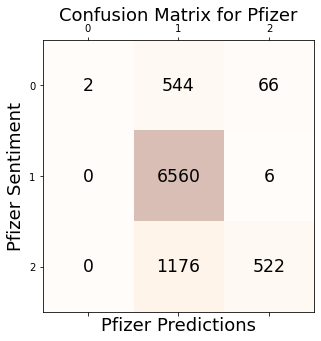

Pfizer NB Accuracy: 79.81072555205047
Pfizer NB recall: 43.65915567335643
Pfizer NB Precision: 89.03528033962816
Pfizer NB F1-score: 44.85839226840789
78.55% accuracy with a standard deviation of 0.00


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
def Naive_bayes_model(x_train, y_train, x_test, y_test, xtidf, vacc_name):
  nb_model= MultinomialNB()
  nb_model.fit(x_train, y_train)
  print(vacc_name+' NaiveBayes Score: %.3f' % nb_model.score(x_test, y_test))
  predictions = nb_model.predict(x_test)
  print(predictions)
  conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)
  fig, ax = plt.subplots(figsize=(5, 5))
  ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
  plt.xlabel(vacc_name+' Predictions', fontsize=18)
  plt.ylabel(vacc_name+' Sentiment', fontsize=18)
  plt.title('Confusion Matrix for '+vacc_name, fontsize=18)
  plt.show()
  accuracy = accuracy_score(y_test, predictions) * 100
  recall = recall_score (y_test, predictions, average='macro') *100
  precision = precision_score(y_test, predictions, average='macro') *100
  f1_scorep = f1_score(y_test, predictions, average='macro') *100

  nb_cross_valid_scores=cross_val_score(nb_model,xtfidf,y.values,cv=10)
  print(vacc_name+' NB Accuracy:', accuracy)
  print(vacc_name+' NB recall:', recall)
  print(vacc_name+' NB Precision:', precision)
  print(vacc_name+' NB F1-score:', f1_scorep)
  print("%0.2f%% accuracy with a standard deviation of %0.2f" % (nb_cross_valid_scores.mean()*100, nb_cross_valid_scores.std()))


Naive_bayes_model(x_train_m, y_train_m, x_test_m, y_test_m, xtfidf, "Moderna")
Naive_bayes_model(x_train_p, y_train_p, x_test_p, y_test_p, xtfidfp, "Pfizer")

**LOGISTIC REGRESSION MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression
def LogisticR_model(x_train, y_train, x_test, y_test, xtidf, vacc_name):
  logist_model = LogisticRegression(solver='lbfgs', max_iter=1000)
  logist_model.fit(x_train, y_train)
  print(vacc_name+' Logistic Regression Score: %.3f' % logist_model.score(x_test,y_test))
  predictions_l = logist_model.predict(x_test)
  predictions_l
  accuracy = accuracy_score(y_test, predictions_l) * 100
  recall = recall_score (y_test, predictions_l, average='macro') *100
  precision = precision_score(y_test, predictions_l, average='macro') *100
  f1_scorep = f1_score(y_test, predictions_l, average='macro') *100
  print(vacc_name+' Logist Accuracy:', accuracy)
  print(vacc_name+' Logist recall:', recall)
  print(vacc_name+' Logist Precision:', precision)
  print(vacc_name+' Logist F1-score:', f1_scorep)
  #logist_cross_valid_scores=cross_val_score(logist_model, xtidf, y.values,cv=10)
  #print("%0.2f%% accuracy with a standard deviation of %0.2f" % (logist_cross_valid_scores.mean()*100, logist_cross_valid_scores.std()))

LogisticR_model(x_train_m,y_train_m,x_test_m,y_test_m,xtfidf, "Moderna ")
LogisticR_model(x_train_p,y_train_p,x_test_p,y_test_p,xtfidfp, "Pfizer ")

Moderna  Logistic Regression Score: 0.924
Moderna  Logist Accuracy: 92.37269040108157
Moderna  Logist recall: 79.98438498968964
Moderna  Logist Precision: 93.98009467752232
Moderna  Logist F1-score: 85.26594368647991
Pfizer  Logistic Regression Score: 0.928
Pfizer  Logist Accuracy: 92.84587652095539
Pfizer  Logist recall: 77.67644124963594
Pfizer  Logist Precision: 93.90865191605887
Pfizer  Logist F1-score: 83.59094366949003


**KNN MODEL**

In [ ]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
def KNN_model(x_train, y_train, x_test, y_test, xtidf, vacc_name):
  knn_model = KNeighborsClassifier(n_neighbors=27)
  knn_model.fit(x_train, y_train)
  print('KNN Score: %.3f' % knn_model.score(x_test,y_test))
  predictions_knn = knn_model.predict(x_test)
  accuracy = accuracy_score(y_test, predictions_knn) * 100
  recall = recall_score (y_test, predictions_knn, average='macro') *100
  precision = precision_score(y_test, predictions_knn, average='macro') *100
  f1_scorep = f1_score(y_test, predictions_knn, average='macro') *100
  print(vacc_name+' KNN Accuracy:', accuracy)
  print(vacc_name+' KNN recall:', recall)
  print(vacc_name+' KNN Precision:', precision)
  print(vacc_name+' KNN F1-score:', f1_scorep)
  #knn_cross_valid_scores=cross_val_score(knn_model_m,xtidf,y.values,cv=10)
  #print("%0.2f%% accuracy with a standard deviation of %0.2f" % (knn_cross_valid_scores.mean()*100, knn_cross_valid_scores.std()))

KNN_model(x_train_m,y_train_m,x_test_m,y_test_m,xtfidf, "Moderna ")
KNN_model(x_train_p,y_train_p,x_test_p,y_test_p,xtfidfp, "Pfizer ")

KNN Score: 0.705
Moderna  KNN Accuracy: 70.47093285263632
Moderna  KNN recall: 34.454982885245364
Moderna  KNN Precision: 90.11465640793543
Moderna  KNN F1-score: 29.73152938611407
KNN Score: 0.746
Pfizer  KNN Accuracy: 74.57187922487607
Pfizer  KNN recall: 35.05019790616408
Pfizer  KNN Precision: 90.54896354238832
Pfizer  KNN F1-score: 31.796956487016587


**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
def Decision_tree(x_train, y_train, x_test, y_test, xtidf, vacc_name):
  dt_model = DecisionTreeClassifier(random_state=0)
  dt_model = dt_model.fit(x_train,y_train)
  print('Decision Tree Score: %.3f' % dt_model.score(x_test,y_test))
  predictions_dt = dt_model.predict(x_test)
  accuracy = accuracy_score(y_test, predictions_dt) * 100
  recall = recall_score (y_test, predictions_dt, average='macro') *100
  precision = precision_score(y_test, predictions_dt, average='macro') *100
  f1_scorep = f1_score(y_test, predictions_dt, average='macro') *100
  print(vacc_name+' DT Accuracy:', accuracy)
  print(vacc_name+' DT recall:', recall)
  print(vacc_name+' DT Precision:', precision)
  print(vacc_name+' DT F1-score:', f1_scorep)
  #dt_cross_valid_scores_m=cross_val_score(dt_model_m,xtfidf,y.values,cv=10)
  #print("%0.2f%% accuracy with a standard deviation of %0.2f" % (dt_cross_valid_scores_m.mean()*100, dt_cross_valid_scores_m.std()))

Decision_tree(x_train_m,y_train_m,x_test_m,y_test_m,xtfidf, "Moderna ")
Decision_tree(x_train_p,y_train_p,x_test_p,y_test_p,xtfidfp, "Pfizer ")

Decision Tree Score: 0.985
Moderna  DT Accuracy: 98.49031095087878
Moderna  DT recall: 96.1433461227481
Moderna  DT Precision: 96.87239673100721
Moderna  DT F1-score: 96.50013745719725
Decision Tree Score: 0.984
Pfizer  DT Accuracy: 98.38891392519152
Pfizer  DT recall: 94.92322997327078
Pfizer  DT Precision: 95.54120543100181
Pfizer  DT F1-score: 95.22600273851087


**Topic Modeling**

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 8.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 9.9MB 22.7MB/s 
     |████████████████████████████████| 15.3MB 328kB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-cp37-none-any.whl size=136870 sha256=b8a47d29d2547735611c5b0a827f76c2f664de2aeda635b32ea500e0dc9cc1f2
  Stored in directory: /root/.cache/pip/wheels/a0/9c/fc/c6e00689d35c82cf96a8adc70edfe7ba7904374fdac3240ac2
Successfully built pyLDAvis
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.1.0; python_version >= "3.0", but you'll have pandas 1.2.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0

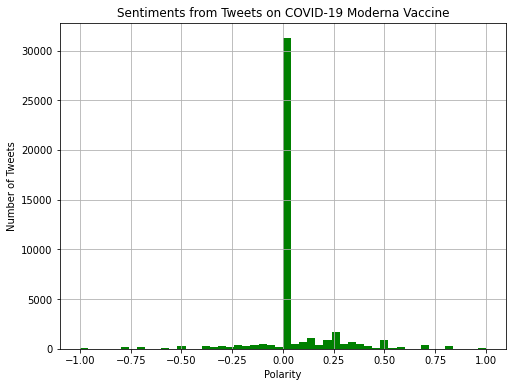

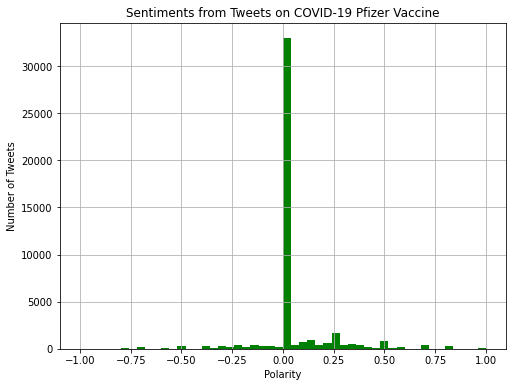

In [ ]:
#histogram plotting
%matplotlib inline
import matplotlib.pyplot as plt
def Histogram_V(dframe, vacc_name):
  fig, ax = plt.subplots(figsize=(8, 6))
  dataframe.columns
  dframe.hist(bins=50, figsize=(20,15), ax=ax, color="green")
  plt.title("Sentiments from Tweets on COVID-19 "+vacc_name+" Vaccine")
  plt.xlabel("Polarity")
  plt.ylabel("Number of Tweets")
  plt.savefig("attribute_histogram_plotstrain"+vacc_name)
  plt.show()
Histogram_V(dataframe[['modernasentiment', 'moderna_cleaned', 'moderna_polarity' ]], "Moderna")
Histogram_V(dataframe[['pfizersentiment', 'pfizer_cleaned', 'pfizer_polarity' ]], "Pfizer")





In [ ]:
dataframe[['modernasentiment', 'moderna_cleaned', 'moderna_polarity']].plot.scatter(x = 'moderna_polarity', y = 'moderna_cleaned')

In [ ]:
dataframe[['pfizersentiment', 'pfizer_cleaned', 'pfizer_polarity']].plot.scatter(x = 'pfizer_polarity', y = 'pfizer_cleaned')

**LDA MODELLING**

In [ ]:
!pip install gensim
!pip install pyLDAvis
!pip install pandas-profiling
!pip install pandas

In [ ]:
import gensim.corpora as corpora
import gensim
import pprint
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

def LDAModelling(vacc_name):
  datacleaned  = [d.split() for d in dataframe[vacc_name+'_cleaned']]
  id2word = corpora.Dictionary(datacleaned)
  texts = datacleaned
  corpus = [id2word.doc2bow(text) for text in texts]
  print(corpus[:1])
  #readable format of corpus (term-frequency)
  [[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=20, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
  doc_lda = lda_model[corpus]
  print(vacc_name+' Perplexity: ', lda_model.log_perplexity(corpus))  
  #Coherence Score
  coherence_model_lda = CoherenceModel(model=lda_model, texts=datacleaned, dictionary=id2word, coherence='c_v')
  coherence_lda = coherence_model_lda.get_coherence()
  print('Coherence Score for '+vacc_name+': ', coherence_lda)
  return lda_model, corpus, id2word


pyLDAvis.enable_notebook()
lda_model, corpus, id2word = LDAModelling("moderna")
lda_viz = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(lda_viz)

LDAModelling("pfizer")
lda_viz = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(lda_viz)

[[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]]


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

moderna Perplexity:  -11.976452126086306
Coherence Score for moderna:  0.41505009264087944
[[(0, 1), (1, 1), (2, 1), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]]


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

**LSA MODELLING**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[(0, '0.831*"moderna" + 0.232*"vaccin" + 0.214*"pfizer" + 0.203*"de" + 0.154*"got" + 0.148*"la" + 0.145*"shot" + 0.107*"dose" + 0.103*"second" + 0.095*"get"'), (1, '0.682*"de" + 0.511*"la" + 0.210*"que" + -0.175*"moderna" + 0.147*"en" + -0.137*"vaccin" + 0.131*"el" + -0.130*"got" + -0.122*"shot" + 0.111*"e"'), (2, '0.819*"vaccin" + 0.280*"pfizer" + -0.223*"shot" + -0.208*"moderna" + -0.189*"got" + 0.155*"covid" + -0.135*"second" + 0.094*"le" + -0.074*"nd" + 0.071*"johnson"'), (3, '-0.689*"pfizer" + 0.394*"vaccin" + 0.296*"got" + 0.260*"shot" + -0.186*"moderna" + 0.184*"second" + 0.165*"de" + 0.143*"first" + 0.127*"dose" + 0.105*"la"'), (4, '0.508*"pfizer" + 0.376*"shot" + 0.368*"got" + 0.353*"de" + -0.346*"moderna" + -0.198*"la" + -0.159*"que" + 0.151*"second" + -0.143*"e" + 0.131*"get"'), (5, '-0.644*"la" + 0.537*"de" + -0.242*"pfizer" + -0.222*"shot" + 0.196*"moderna

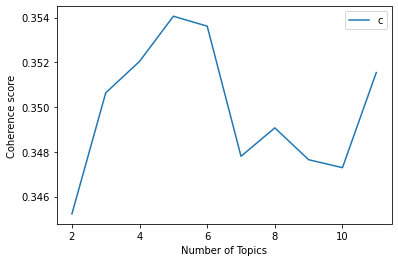

[(0, '0.789*"pfizer" + 0.356*"de" + 0.252*"la" + 0.191*"vaccin" + 0.134*"que" + 0.116*"dose" + 0.114*"got" + 0.099*"moderna" + 0.092*"shot" + 0.085*"vacuna"'), (1, '0.616*"de" + 0.445*"la" + -0.382*"pfizer" + -0.208*"vaccin" + 0.198*"que" + -0.147*"got" + 0.143*"vacuna" + -0.117*"shot" + 0.114*"el" + 0.107*"en"'), (2, '0.851*"vaccin" + 0.268*"de" + -0.259*"pfizer" + 0.164*"covid" + -0.137*"la" + -0.135*"shot" + -0.100*"que" + 0.092*"le" + 0.082*"dose" + -0.071*"got"'), (3, '0.591*"de" + -0.584*"la" + -0.301*"vaccin" + -0.281*"que" + 0.172*"dose" + 0.102*"da" + 0.100*"got" + -0.088*"con" + -0.086*"e" + 0.085*"shot"'), (4, '-0.514*"got" + -0.373*"shot" + -0.368*"la" + 0.290*"pfizer" + -0.237*"first" + -0.234*"dose" + -0.231*"second" + 0.200*"que" + 0.189*"moderna" + -0.108*"nd"'), (5, '0.761*"que" + -0.327*"la" + 0.278*"dose" + 0.196*"got" + 0.181*"e" + -0.151*"moderna" + -0.146*"pfizer" + 0.134*"lo" + 0.112*"first" + 0.105*"da"'), (6, '-0.739*"dose" + 0.525*"shot" + -0.197*"la" + 0.149*

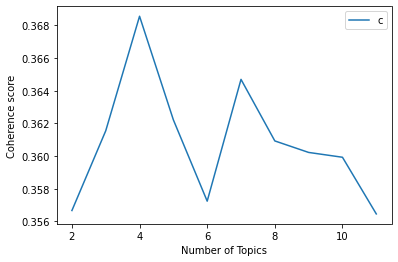

In [ ]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import nltk 
nltk.download('stopwords')

def preprocess_data(doc_set): 
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

def plot_graph( doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

def prepare_corpus(doc_clean):
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

def LSA_model(vacc_name, doc_clean,number_of_topics,words): 
  dictionary,doc_term_matrix=prepare_corpus(doc_clean)
  lsamodel = LsiModel(doc_term_matrix, num_topics=20, id2word = dictionary)  # train model
  print(lsamodel.print_topics(num_topics=20, num_words=10))
  return lsamodel

number_of_topics=20
words=10
clean_text=preprocess_data(dataframe['moderna_cleaned'])
print("LSA Model for Moderna:")
model = LSA_model("moderna", clean_text,number_of_topics,words)
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

print("\n\n\nLSA Model for Pfizer:")
clean_text=preprocess_data(dataframe['pfizer_cleaned'])
model = LSA_model("pfizer", clean_text,number_of_topics,words)
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)